# Chapter 2 Exercises

```{exercise}
:label: ch2-ex-eq-to-butcher

Write the following Runge-Kutta method in a Butcher tableau.
\begin{align*}
    y_{n+1} &=y_n +\frac{h}{6}(k_1 +4k_3 +k_4 ),\\
    k_1 &=f(t_n ,y_n ),\\
    k_2 &=f(t_n +\frac{1}{4}h,y_n +\frac{1}{4}hk_1 ),\\
    k_3 &=f(t_n +\frac{1}{2}h,y_n +\frac{1}{2}hk_2 ),\\
    k_4 &=f(t_n +h,y_n +h(k_1 -2k_2 +2k_3 )).
\end{align*}
```

```{solution} ch2-ex-eq-to-butcher
:class: dropdown
:label: ch2-ex-eq-to-butcher-sol

\begin{align*}
    \begin{array}{c|cccc}
        0 & 0 \\
        1/4 & 1/4 \\
        1/2 & 0 & 1/2 \\
        1 & 1 & -2 & 2 \\ \hline
        & 1/6 & 0 & 2/3 & 1/6
    \end{array}
\end{align*}
```

```{exercise}
:class: note
:label: ch2-ex-butcher-to-eq

Write out the equations for the following Runge-Kutta method.
\begin{align*}\begin{array}{c|cccc}
    0 &  &  &  & \\
    1/4 & 1/4 &  &  & \\
    1/2 & -1/2 & 1 &  & \\
    1 & 1/4 & 0 & 3/4 & \\ \hline
    & 0 & 4/9 & 1/3 & 2/9
\end{array}\end{align*}
```

```{solution} ch2-ex-butcher-to-eq
:class: dropdown
:label: ch2-ex-butcher-to-eq-sol

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{9}(4k_2 + 3k_3 + 2k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \frac{1}{4}h, y_n + \frac{1}{4} h k_1), \\
    k_3 &= f(t_n + \frac{1}{2}h, y_n + h ( - \frac{1}{2}k_1 + k_2)), \\
    k_4 &= f(t_n + h, y_n + h ( \frac{1}{4}k_1 + \frac{3}{4}k_3)).
\end{align*}
```


```{exercise}
:class: note
:label: ch2-ex-myrk2-derivation

Derive an explicit second-order Runge-Kutta method where $b_1 =\frac{1}{3}$.
```

``````{solution} ch2-ex-myrk2-derivation
:class: dropdown
:label: ch2-ex-myrk2-derivation-sol

The order conditions are:

\begin{align*}
    \frac{1}{3} + b_2 &=1,\\
    c_2 b_2 &=\frac{1}{2},\\
    a_{21} &= c_2.
\end{align*}

Solving gives $b_2 = \frac{2}{3}$, $c_2=\frac{3}{4}$ and $a_{21} = \frac{3}{4}$ so the method is

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{3}(k_1 + 2k_2), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \frac{3}{4}h, y_n + \frac{3}{4}h k_1).
\end{align*}

Alternatively as a Butcher tableau
\begin{align*}
    \begin{array}{c|cc}
    0 & 0 \\
    3/4 & 3/4 & 0 \\ \hline
    & 1/3 & 2/3
    \end{array}
\end{align*}

`````{tab-set}
````{tab-item} Python
```python
from sympy import *

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
b1 = Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
solve((eq1, eq2, eq3))
```

````

````{tab-item} MATLAB
```matlab
% Declare symbolic variables
syms a21 b1 b2 c2
b1 = 1 / 3;

% Define order conditions
eq1 = b1 + b2 == 1;
eq2 = b2 * c2 == 1 / 2;
eq3 = a21 == c2;

% Solve order conditions
solve(eq1, eq2, eq3)
```

````
`````
``````

In [ ]:
import sympy as sp

# Declare symbolic variables
a21, b1, b2, c2 = sp.symbols('a21, b1, b2, c2')
b1 = sp.Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - sp.Rational(1,2)
eq3 = a21 * b2 - sp.Rational(1,2)

# Solve order conditions
sp.solve((eq1, eq2, eq3))

<!-- ```{exercise}
:class: note
:label: ch2-ex-rk3-order-cond

Derive the order conditions for a third-order explicit Runge-Kutta method.
```

````{solution} ch2-ex-rk3-order-cond
:class: dropdown
:label: ch2-ex-rk3-order-cond-sol

Listing all of the rooted trees up to and including order 3.

```{list-table}
:header-rows: 0

* - Tree
  - ![](/_images/tree_1.svg)
  - ![](/_images/tree_2.svg)
  - ![](/_images/tree_3_1.svg)
  - ![](/_images/tree_3_2.svg)
* - $\Phi$ 
  - $\displaystyle\sum_{i=1}^{3} b_i$
  - $\displaystyle\sum_{i=1}^{3} b_ic_i$
  - $\displaystyle\sum_{i=1}^{3} b_ic_i^2$
  - $\displaystyle\sum_{i,j=1}^3 b_ia_{ij}c_j$
* - $\gamma$
  - 1
  - 2
  - 3
  - 6
```

Using $\Phi = \dfrac{1}{\gamma}$ and that $c_1=0$, $a_{ij} = 0$ where $i \geq j$

$$ \begin{align*}
    b_1 + b_2 + b_3 &= 1, \\
    b_2c_2 + b_3c_3 &= \frac{1}{2}, \\
    b_2c_2^2 + b_3c_3^2 &= \frac{1}{3}, \\
    b_3a_{32}c_2 &= \frac{1}{6}.
\end{align*} $$

```` -->

<!-- ```{exercise} 
:class: note
:label: ch2-ex-myrk3-derivation

Derive a third-order explicit Runge-Kutta method where $c_2 = \frac{1}{2}$ and $c_3 = 1$.
```

``````{solution} ch2-ex-myrk3-derivation
:class: dropdown
:label: ch2-ex-myrk3-derivation-sol

Substituting the values of $c_2$ and $c_3$ into the order conditions gives

$$ \begin{align*}
    b_1 + b_2 + b_3 &= 1, \\
    \frac{1}{2}b_2 + b_3 &= \frac{1}{2}, \\
    \frac{1}{4}b_2 + b_3 &= \frac{1}{3}, \\
    \frac{1}{2}b_3a_{32} &= \frac{1}{6}.
\end{align*} $$

Solving the second and third equations gives $b_2 = \frac{2}{3}$ and $b_3 = \frac{1}{6}$. Substituting these into the first equation gives $b_1 = \frac{1}{6}$. Substituting the $b$ values into the fourth equation gives $a_{32} = 2$. Applying the row sum conditions gives $a_{21} = c_2 = \frac{1}{2}$ and $a_{31} = c_1 - a_{32} = 1 - 2 = -1$. The Butcher tableau for this third-order explicit Runge-Kutta method is

$$ \begin{align*}
    \begin{array}{c|ccc}
        0 & \\
        1/2 & 1/2 \\
        1 & -1 & 2 \\ \hline
        & 1/6 & 2/3 & 1/6
    \end{array}
\end{align*} $$

This is known as Kutta's third-order method.

`````{tab-set}
````{tab-item} Python

```python
import sympy as sp
sp.init_printing(use_latex="mathjax")

# Declare symbolic variables
a21, a31, a32, b1, b2, b3 = sp.symbols('a21, a31, a32, b1, b2, b3')
c2 = sp.Rational(1,2)
c3 = 1

# Define order conditions
eq1 = b1 + b2 + b3 - 1
eq2 = b2 * c2 + b3 * c3 - sp.Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 - sp.Rational(1,3)
eq4 = b3 * a32 * c2 - sp.Rational(1,6)

# Row sum conditions
eq5 = c2 - a21
eq6 = c3 - a31 - a32

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))
```

````

````{tab-item} MATLAB

```matlab
% Define symbolic variables
syms a21 a31 a32 b1 b2 b3

% Define c values
c2 = 1/2;
c3 = 1;

% Define order conditions
eq1 = b1 + b2 + b3 == 1;
eq2 = b2 * c2 + b3 * c3 == 1/2;
eq3 = b2 * c2^2 + b3 * c3^2 == 1/3;
eq4 = b3 * a32 * c2 == 1/6;

% Define row sum conditions
eq5 = c2 == a21;
eq6 = c3 == a31 + a32;

% Solve order conditions
solve(eq1, eq2, eq3, eq4, eq5, eq6)
```

````
`````
`````` -->

In [ ]:
import sympy as sp

# Declare symbolic variables
a21, a31, a32, b1, b2, b3 = sp.symbols('a21, a31, a32, b1, b2, b3')
c2 = sp.Rational(1,2)
c3 = 1

# Define order conditions
eq1 = b1 + b2 + b3 - 1
eq2 = b2 * c2 + b3 * c3 - sp.Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 - sp.Rational(1,3)
eq4 = b3 * a32 * c2 - sp.Rational(1,6)

# Row sum conditions
eq5 = c2 - a21
eq6 = c3 - a31 - a32

# Solve order conditions
sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))

````{exercise}
:label: ch2-ex-tree

Determine the order, elementary weight and density of this rooted tree.

```{figure} /_images/rooted_tree_exercise.svg
:width: 200
```

````

````{solution} ch2-ex-tree
:class: dropdown

Adding the labels to the tree

```{figure} ../_images/rooted_tree_exercise_solution.svg
:width: 500
```

$$ \begin{align*}
    r &= 10, \\
    \Phi &= \sum_{i,j,k,\ell} b_i a_{ij} a_{ik} a_{k\ell} c_j^3 c_k c_\ell^2, \\
    \gamma &= 10 \cdot 4 \cdot 5 \cdot 3 = 600.
\end{align*} $$
````

```{exercise}
:label: ch2-ex-rk3-order-conditions

Derive the order conditions for a third-order explicit Runge-Kutta method.
```

````{solution} ch2-ex-rk3-order-conditions
:class: dropdown

The set of rooted trees up to and including order 3 are

| Tree | $\Phi$ | $\gamma$ |
|:----:|:------------------:|:-------:|
| ![](/_images/tree_1.svg) | $\displaystyle\sum_i b_i$ | 1 |
| ![](/_images/tree_2.svg) | $\displaystyle\sum_i b_ic_i$ | 2 |
| ![](/_images/tree_3_1.svg) | $\displaystyle\sum_i b_ic_i^2$ | 3 | 
| ![](/_images/tree_3_2.svg) | $\displaystyle\sum_{i,j} b_i a_{ij} c_j$ | 6 |

Using $\Phi = \dfrac{1}{\gamma}$ we have

$$ \begin{align*}
    b_1 + b_2 + b_3 &= 1, \\
    \textcolor{red}{b_1 c_1} + b_2 c_2 + b_3 c_3 &= \frac{1}{2}, \\
    \textcolor{red}{b_1 c_1^2} + b_2 c_2^2 + b_3 c_3^2 &= \frac{1}{3}, \\
    \textcolor{red}{b_1 a_{11} c_1} + \textcolor{red}{b_1 a_{12} c_2} + \textcolor{red}{b_1 a_{13} c_3} \quad & \\
    \textcolor{red}{b_2 a_{21} c_1} + \textcolor{red}{b_2 a_{22} c_2} + \textcolor{red}{b_2 a_{23} c_3} \quad & \\
    \textcolor{red}{b_3 a_{31} c_1} + b_3 a_{32} c_2 + \textcolor{red}{b_3 a_{33} c_3} &= \frac{1}{6}.
\end{align*} $$ 

Since for an ERK method $c_1 = 0$ and $a_{ij} = 0$ where $i \leq j$ then the terms in red are zero so the order conditions are (including the row sum conditions)

$$ \begin{align*}
    b_1 + b_2 + b_3 &= 1, \\
    b_2 c_2 + b_3 c_3 &= \frac{1}{2}, \\
    b_2 c_2^3 + b_3 c_3^2 &= \frac{1}{3}, \\
    b_3 a_{32} c_2 &= \frac{1}{6}, \\
    a_{21} &= c_2, \\
    a_{31} + a_{32} &= c_3.
\end{align*} $$
````

```{exercise}
:label: ch2-ex-myrk4-derivation

Derive an explicit fourth-order Runge-Kutta method where $c_2 = \frac{1}{4}$, $c_3 = \frac{1}{2}$ and $c_4 = 1$. (Hint: you may need to solve some of the order conditions separately to get Python and MATLAB to return a solution).
```

``````{solution} ch2-ex-myrk4-derivation
:class: dropdown

Substituting $c_2$, $c_3$ and $c_4$ into the order conditions gives

$$ \begin{align*}
    b_1 + b_2 + b_3 + b_4 &= 1, \\
    \frac{1}{4}b_2 + \frac{1}{2}b_3 + b_4 &= \frac{1}{2}, \\
    \frac{1}{16}b_2 + \frac{1}{4}b_3 + b_4 &= \frac{1}{3}, \\
    \frac{1}{64}b_2 + \frac{1}{8}b_3 + b_4 &= \frac{1}{4}, \\
    \frac{1}{4}b_3a_{32} + \frac{1}{4}b_4a_{42} + \frac{1}{2}b_4a_{43} &= \frac{1}{6}, \\
    \frac{1}{8}b_3a_{32} + \frac{1}{4}b_4a_{42} + \frac{1}{2}b_4a_{43} &= \frac{1}{8}, \\
    \frac{1}{16}b_3a_{32} + \frac{1}{16}b_4a_{42} + \frac{1}{4}b_4a_{43} &= \frac{1}{12}, \\
    \frac{1}{4}b_4a_{43}a_{32} &= \frac{1}{24}.
\end{align*} $$

Solving the second, third and fourth equations using Gaussian elimination

$$ \begin{align*}
    & \left( \begin{array}{ccc|c}
        1/4 & 1/2 & 1 & 1/2 \\
        1/16 & 1/4 & 1 & 1/3 \\
        1/64 & 1/8 & 1 & 1/4
    \end{array} \right)
    \begin{array}{l} 4R_1 \\ \phantom{x} \\ \phantom{x} \end{array}
    & \longrightarrow
    & \left( \begin{array}{ccc|c}
        1 & 2 & 4 & 2 \\
        1/16 & 1/4 & 1 & 1/3 \\
        1/64 & 1/8 & 1 & 1/4
    \end{array} \right)
    \begin{array}{l} \\ R_2 - \frac{1}{16}R_1 \\ R_3 - \frac{1}{64}R_1 \end{array} \\ \\
    \longrightarrow
    & \left( \begin{array}{ccc|c}
        1 & 2 & 4 & 2 \\
        0 & 1/8 & 3/4 & 5/24 \\
        0 & 0 & 3/4 & 1/8
    \end{array} \right)
    \begin{array}{l} \\ 8R_2 \\ \phantom{x} \end{array}
    &\longrightarrow
    & \left( \begin{array}{ccc|c}
        1 & 2 & 4 & 2 \\
        0 & 1 & 6 & 5/3 \\
        0 & 0 & 3/4 & 1/8
    \end{array} \right)
    \begin{array}{l} R_1 - 2R_2 \\ \phantom{x} \\ \frac{4}{3}R_3 \end{array} \\ \\
    \longrightarrow
    & \left( \begin{array}{ccc|c}
        1 & 0 & -8 & -4/3 \\
        0 & 1 & 6 & 5/3 \\
        0 & 0 & 1 & 1/6
    \end{array} \right)
    \begin{array}{l} R_1 + 8R_3 \\ R_2 - 6R_3 \\ \phantom{x} \end{array}
    &\longrightarrow
    & \left( \begin{array}{ccc|c}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 2/3 \\
        0 & 0 & 1 & 1/6
    \end{array} \right)
\end{align*} $$

So $b_2 = 0$, $b_3 = \frac{2}{3}$ and $b_4 = \frac{1}{6}$. Using the first order condition we have $b_1 = \frac{1}{6}$. Substituting these values into the fifth, sixth and seventh order conditions

$$ \begin{align*}
    \frac{1}{6}a_{32} + \frac{1}{24}a_{42} + \frac{1}{12}a_{43} &= \frac{1}{6}, \\
    \frac{1}{12}a_{32} + \frac{1}{24}a_{42} + \frac{1}{12}a_{43} &= \frac{1}{8}, \\
    \frac{1}{24}a_{32} + \frac{1}{96}a_{42} + \frac{1}{24}a_{43} &= \frac{1}{12}, \\
\end{align*} $$

Solving using Gaussian elimination

$$ \begin{align*}
    &\left( \begin{array}{ccc|c}
        1/6 & 1/24 & 1/12 & 1/6 \\
        1/12 & 1/24 & 1/12 & 1/8 \\
        1/24 & 1/96 & 1/24 & 1/12
    \end{array} \right)
    \begin{array}{l} 6 R_1 \\ 24R_2 \\ 96R_3 \phantom{x} \end{array}
    & \longrightarrow 
    & \left( \begin{array}{ccc|c}
        1 & 1/4 & 1/2 & 1 \\
        2 & 1 & 2 & 3 \\
        4 & 1 & 4 & 8
    \end{array} \right)
    \begin{array}{l}  \\ R_2 - 2 R_1 \\ R_3 - 4R_1 \end{array} \\ \\
    \longrightarrow 
    & \left( \begin{array}{ccc|c}
        1 & 1/4 & 1/2 & 1 \\
        0 & 1/2 & 1 & 1 \\
        0 & 0 & 2 & 4
    \end{array} \right)
    \begin{array}{l} \\ 2R_2 \\ \phantom{x} \end{array}
    & \longrightarrow 
    & \left( \begin{array}{ccc|c}
        1 & 1/4 & 1/2 & 1 \\
        0 & 1 & 2 & 2 \\
        0 & 0 & 2 & 4
    \end{array} \right)
    \begin{array}{l} R_1 - \frac{1}{4}R_2 \\  \\ \frac{1}{2}R_3 \end{array} \\ \\
    \longrightarrow 
    & \left( \begin{array}{ccc|c}
        1 & 0 & 0 & 1/2 \\
        0 & 1 & 2 & 2 \\
        0 & 0 & 1 & 2
    \end{array} \right)
    \begin{array}{l}  \\ R_2 - 2R_3 \\ \phantom{x} \end{array}
    &\longrightarrow 
    & \left( \begin{array}{ccc|c}
        1 & 0 & 0 & 1/2 \\
        0 & 1 & 0 & -2 \\
        0 & 0 & 1 & 2
    \end{array} \right)
    \begin{array}{l}  \\ R_2 - 2R_3 \\ \phantom{x} \end{array}
\end{align*} $$

So $a_{32} = \frac{1}{2}$, $a_{42} = -2$ and $a_{43} = 2$. Using the row sum condition gives $a_{31} = c_3 - a_{32} = \frac{1}{2} - \frac{1}{2} = 0$ and $a_{41} = c_4 - a_{42} - a_{43} = 1 - (-2) - 2 = 1$. The Butcher tableau for this method is

$$ \begin{align*}
    \begin{array}{c|cccc}
        0 & \\
        1/4 & 1/4 \\
        1/2 & 0 & 1/2 \\
        1 & 1 & -2 & 2 \\ \hline
        & 1/6 & 0 & 2/3 & 1/6
    \end{array}
\end{align*} $$

`````{tab-set}
````{tab-item} Python

```python
import sympy as sp

# Declare symbolic variables
a21, a31, a32, a41, a42, a43, b1, b2, b3, b4 = sp.symbols("a21, a31, a32, a41, a42, a43, b1, b2, b3, b4")

# Define c values
c2, c3, c4 = sp.Rational(1,4), sp.Rational(1,2), 1

# Solve for the b values
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - sp.Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - sp.Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 3 - sp.Rational(1,4)

sol = sp.solve((eq1, eq2, eq3, eq4)) 
print(sol)
b1, b2, b3, b4 = sol[b1], sol[b2], sol[b3], sol[b4]

# Solve for a32, a42 and a43
eq5 = b3 * a32 * c2 + b4 * a42 * c2 + b4 * a43 * c3 - sp.Rational(1,6)
eq6 = b3 * a32 * c3 * c2 + b4 * c4 * a42 * c2 + b4 * c4 * a43 * c3 - sp.Rational(1,8)
eq7 = b3 * a32 * c2 ** 2 + b4 * a42 * c2 ** 2 + b4 * a43 * c3 ** 2 - sp.Rational(1,12)

sol = sp.solve((eq5, eq6, eq7)) 
print(sol)
a32, a42, a43 = sol[a32], sol[a42], sol[a43]

# Solve for a21, a31 and a41
eq8 = c2 - a21
eq9 = c3 - a31 - a32
eq10 = c4 - a41 - a42 - a43
sol = sp.solve((eq8, eq9, eq10))
print(sol)
```

````

````{tab-item} MATLAB

```matlab
% Define symbolic variables
syms a21 a31 a32 a41 a42 a43 b1 b2 b3 b4

% Define c values
c2 = 1/4;
c3 = 1/2;
c4 = 1;

% Solve for the b values
eq1 = b1 + b2 + b3 + b4 == 1;
eq2 = b2 * c2 + b3 * c3 + b4 * c4 == 1/2;
eq3 = b2 * c2^2 + b3 * c3^2 + b4 * c4^2 == 1/3;
eq4 = b2 * c2^3 + b3 * c3^3 + b4 * c4^3 == 1/4;

[b1, b2, b3, b4] = solve(eq1, eq2, eq3, eq4)

% Solve for a32 a42 and a43
eq5 = b3 * a32 * c2 + b4 * a42 * c2 + b4 * a43 * c3 == 1/6;
eq6 = b3 * a32 * c3 * c2 + b4 * c4 * a42 * c2 + b4 * c4 * a43 * c3 == 1/8;
eq7 = b3 * a32 * c2^2 + b4 * a42 * c2^2 + b4 * a43 * c3^2 == 1/12;

[a32, a42, a43] = solve(eq5, eq6, eq7)

% Solve for a21, a31 and a41 using row sum conditions
eq9 = c2 - a21;
eq10 = c3 - a31 - a32;
eq11 = c4 - a41 - a42 - a43;

[a21, a31, a41] = solve(eq9, eq10, eq11)
```

````
`````
``````

In [ ]:
import sympy as sp

# Declare symbolic variables
a21, a31, a32, a41, a42, a43, b1, b2, b3, b4 = sp.symbols("a21, a31, a32, a41, a42, a43, b1, b2, b3, b4")

# Define c values
c2, c3, c4 = sp.Rational(1,4), sp.Rational(1,2), 1

# Solve for the b values
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - sp.Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - sp.Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 3 - sp.Rational(1,4)

sol = sp.solve((eq1, eq2, eq3, eq4)) 
print(sol)
b1, b2, b3, b4 = sol[b1], sol[b2], sol[b3], sol[b4]

# Solve for a32, a42 and a43
eq5 = b3 * a32 * c2 + b4 * a42 * c2 + b4 * a43 * c3 - sp.Rational(1,6)
eq6 = b3 * a32 * c3 * c2 + b4 * c4 * a42 * c2 + b4 * c4 * a43 * c3 - sp.Rational(1,8)
eq7 = b3 * a32 * c2 ** 2 + b4 * a42 * c2 ** 2 + b4 * a43 * c3 ** 2 - sp.Rational(1,12)

sol = sp.solve((eq5, eq6, eq7)) 
print(sol)
a32, a42, a43 = sol[a32], sol[a42], sol[a43]

# Solve for a21, a31 and a41
eq8 = c2 - a21
eq9 = c3 - a31 - a32
eq10 = c4 - a41 - a42 - a43
sol = sp.solve((eq8, eq9, eq10))
print(sol)

```{exercise}
:label: ch2-ex-myrk2-hand-calc

Using pen and paper, apply your Runge-Kutta method derived in {ref}`ch2-ex-myrk2-derivation` to solve the following initial value problem using a step length of $h=0.4$

\begin{align*}
    y' =t-y, \qquad t\in [0,2],\qquad y(0)=1
\end{align*}

Write your solutions correct to 4 decimal places.
```

````{solution} ch2-ex-myrk2-hand-calc
:class: dropdown

The $t_n$ values are

$$ \vec{t} = \begin{pmatrix} 0.0 \\ 0.4 \\ 0.8 \\ 1.2 \\ 1.6 \\ 2.0 \end{pmatrix}. $$

Using the second-order ERK method derived in {ref}`ch2-ex-myrk2-derivation`

$$ \begin{align*}
    y_0 &= 1, \\
    k_1 &= f(t_0, y_0) = (0.0) - (1.0) = -1, \\
    k_2 &= f(t_0 + \tfrac{3}{4}h, y_0 + \tfrac{3}{4}hk_1) \\
        &= (0 + \tfrac{3}{4}(0.4)) - (1 + \tfrac{3}{4}(0.4)(-1)) \\
        &= -0.4, \\
    y_1 &= y_0 + \frac{h}{3}(k_1 + k_2) \\
        &= 1 + \frac{0.4}{3}(-1 + 2(-0.4)) \\
        &= 0.76,\\ \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.76) = -0.36, \\
    k_2 &= f(t_1 + \tfrac{3}{4}h, y_1 + \tfrac{3}{4}hk_1) \\
        &= (0.4 + \tfrac{3}{4}(0.4)) - (0.76 + \tfrac{3}{4}(0.4)(-0.36)) \\
        &= 0.048, \\
    y_2 &= y_1 + \frac{h}{3}(k_1 + k_2) \\
        &= 0.76 + \frac{0.4}{3}(-0.36 + 2(0.048)) \\
        &= 0.7248,\\ \\
    k_1 &= f(t_2, y_2) = (0.8) - (0.7248) = 0.0752, \\
    k_2 &= f(t_2 + \tfrac{3}{4}h, y_2 + \tfrac{3}{4}hk_1) \\
        &= (0.8 + \tfrac{3}{4}(0.4)) - (0.7248 + \tfrac{3}{4}(0.4)(0.0752)) \\
        &= 0.3526, \\
    y_3 &= y_2 + \frac{h}{3}(k_1 + k_2) \\
        &= 0.7248 + \frac{0.4}{3}(0.0752 + 2(0.3526)) \\
        &= 0.8289,\\ \\
    k_1 &= f(t_3, y_3) = (1.2) - (0.8289) = 0.3711, \\
    k_2 &= f(t_3 + \tfrac{3}{4}h, y_3 + \tfrac{3}{4}hk_1) \\
        &= (1.2 + \tfrac{3}{4}(0.4)) - (0.8289 + \tfrac{3}{4}(0.4)(0.3711)) \\
        &= 0.5598, \\
    y_4 &= y_3 + \frac{h}{3}(k_1 + k_2) \\
        &= 0.8289 + \frac{0.4}{3}(0.3711 + 2(0.5598)) \\
        &= 1.028,\\ \\
    k_1 &= f(t_4, y_4) = (1.6) - (1.028) = 0.5724, \\
    k_2 &= f(t_4 + \tfrac{3}{4}h, y_4 + \tfrac{3}{4}hk_1) \\
        &= (1.6 + \tfrac{3}{4}(0.4)) - (1.028 + \tfrac{3}{4}(0.4)(0.5724)) \\
        &= 0.7007, \\
    y_5 &= y_4 + \frac{h}{3}(k_1 + k_2) \\
        &= 1.028 + \frac{0.4}{3}(0.5724 + 2(0.7007)) \\
        &= 1.291,\\ \\
\end{align*} $$


So the solution is

$$ \begin{align*}
    \vec{y} &= 
    \begin{pmatrix}
        1 \\
        0.76 \\
        0.7248 \\
        0.8289 \\
        1.0276 \\
        1.2908
    \end{pmatrix}.
\end{align*} $$

````

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = h * np.arange(nsteps + 1)
    y = np.zeros((nsteps + 1,1))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    print(r"$$ \begin{align*}")
    print(rf"    y_0 &= {y[0,0]:0.4}, \\")
    for n in range(nsteps):
        y[n+1,:] = solver(f, t[n], y[n,:], h, n)
    print(r"\end{align*} $$")
              
    return t, y


def myrk2(f, t, y, h, n): 
    k1 = f(t, y)
    k2 = f(t + 3/4 * h, y + 3 / 4 * h * k1)
    ynew = y + h / 3 * (k1 + 2 * k2)

    print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t:0.1f}) - ({y[0]:0.4}) = {k1[0]:0.4}, \\")
    print(rf"    k_2 &= f(t_{n} + \tfrac{{3}}{{4}}h, y_{n} + \tfrac{{3}}{{4}}hk_1) \\") 
    print(rf"        &= ({t:0.1f} + \tfrac{{3}}{{4}}({h})) - ({y[0]:0.4} + \tfrac{{3}}{{4}}({h})({k1[0]:0.4})) \\")
    print(rf"        &= {k2[0]:0.4}, \\")
    print(rf"    y_{n+1} &= y_{n} + \frac{{h}}{{3}}(k_1 + k_2) \\")
    print(rf"        &= {y[0]:0.4} + \frac{{{h}}}{{3}}({k1[0]:0.4} + 2({k2[0]:0.4})) \\")
    print(rf"        &= {ynew[0]:0.4},\\ \\")

    return ynew


def f(t, y):
    return t - y
    

# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]          # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, myrk2 = solveIVP(f, tspan, y0, h, myrk2)

```{exercise}
:label: ch2-ex-myrk2

Define a Python or MATLAB function called `myrk2()` which uses the method from derived in {ref}`ch2-ex-myrk2-derivation` to compute the solution over a single step. Use your function along with the [`solveIVP()`](euler-code-section) function to solve the initial value problem in {ref}`ch2-ex-myrk2-hand-calc`. Present your solution in a table and as a plot of the numerical solutions against the exact solutions on the same set of axes.
```

``````{solution} ch2-ex-myrk2
:class: dropdown

Solution

```
|  t   |     y     |   Exact   |
|:----:|:---------:|:---------:|
| 0.00 |  1.000000 |  1.000000 |
| 0.40 |  0.760000 |  0.740640 |
| 0.80 |  0.724800 |  0.698658 |
| 1.20 |  0.828864 |  0.802388 |
| 1.60 |  1.027628 |  1.003793 |
| 2.00 |  1.290787 |  1.270671 |
```

Plot

```{glue:figure} ch2-ex-myrk2-plot
:figwidth: 500
```

Code

`````{tab-set}
````{tab-item} Python

```python
import numpy as np
import matplotlib.pyplot as plt


def myrk2(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 3/4 * h, y + 3 / 4 * h * k1)
    return y + h / 3 * (k1 + 2 * k2)


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, myrk2)

# Print table of solution values
print("|  t   |     y     |   Exact   |")
print("|:----:|:---------:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} |")
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="myRK2")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
```

````

````{tab-item} MATLAB

```matlab
% Define ODE function and exact solution
f = @(t, y) t - y;
exact = @(t) t + 2 * exp(-t) - 1;

% Define IVP parameters
tspan = [0, 2];     % boundaries of the t domain
y0 = 1;             % initial value of the solution
h = 0.4;            % step length

% Calculate the solution to the IVP
[t, y_myrk2] = solveIVP(f, tspan, y0, h, @myrk2);

% Calculate exact solution for plotting
texact = linspace(tspan(1), tspan(2), 200);
yexact = exact(texact);

% Print table of solution values (for loop is used to group print statements)
for i = 1 : 1
    fprintf('|  t   |     y     |   Exact   |\n|:----:|:---------:|:---------:|');
    for n = 1 : length(t)
        fprintf('\n| %4.2f | %9.6f | %9.6f |', t(n), y_myrk2(n), exact(t(n)));
    end
end

% Plot solution
plot(texact, yexact, 'k-', LineWidth=2)
hold on
plot(t, y_myrk2, 'b-o', LineWidth=2, MarkerFaceColor='b')
hold off
axis padded
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', 'myRK2', Location='northwest', FontSize=12)

% ----------------------------------------------------------------------------
function [t, y] = solveIVP(f, tspan, y0, h, solver)

% Define t and y arrays
t = (tspan(1) : h : tspan(2));
y = zeros(length(t), length(y0));
y(1,:) = y0;

% Loop through the steps and calculate single step solver solution
for n = 1 : length(t) - 1
    y(n+1,:) = solver(f, t(n), y(n,:), h);
end

end

% ----------------------------------------------------------------------------
function ynew = myrk2(f, t, y, h)

k1 = f(t, y);
k2 = f(t + 3/4 * h, y + 3/4 * h * k1);
ynew = y + h / 3 * (k1 + 2 * k2);

end
```

````
`````
``````

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def myrk2(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 3/4 * h, y + 3 / 4 * h * k1)
    return y + h / 3 * (k1 + 2 * k2)


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y = solveIVP(f, tspan, y0, h, myrk2)

# Print table of solution values
print("|  t   |     y     |   Exact   |")
print("|:----:|:---------:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} |")
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="myRK2")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("ch2-ex-myrk2-plot", fig, display=False)

```{exercise}
:label: ch2-ex-myrk4

A third-order explicit Runge-Kutta method has the Butcher tableau

$$ \begin{array}{c|ccc}
    0 & 0 \\
    1/2 & 1/2 \\
    1 & -1 & 2 \\
    \hline
    & 1/6 & 2/3 & 1/6
\end{array} $$

Define two Python or MATLAB functions called `myrk3()` and `myrk4()` which uses this third-order method and the fourth-order method derived {ref}`ch2-ex-myrk4-derivation` to solve an initial value problem. Use your functions, along with your code from {ref}`ch2-ex-myrk2`, to solve the initial value problem in {ref}`ch2-ex-myrk2-hand-calc`. Present your solutions as a plot of the numerical solutions against the exact solution on the same set of axes. 
```

``````{solution} ch2-ex-myrk4
:class: dropdown
 
Plot

```{glue:figure} ch2-ex-myrk4-plot
:figwidth: 500
```

Code

`````{tab-set} 
````{tab-item} Python

```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def myrk2(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 3/4 * h, y + 3 / 4 * h * k1)
    return y + h / 3 * (k1 + 2 * k2)


def myrk3(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 1/2 * h, y + 1/2 * h * k1)
    k3 = f(t + h, y + h * (-k1 + 2 * k2))
    return y + h / 6 * (k1 + 4 * k2 + k3)


def myrk4(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 1/4 * h, y + 1/4 * h * k1)
    k3 = f(t + 1/2 * h, y + 1/2 * h * k2)
    k4 = f(t + h, y + h * (k1 - 2 * k2 + 2 * k3))
    return y + h / 6 * (k1 + 4 * k3 + k4)


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_myrk2 = solveIVP(f, tspan, y0, h, myrk2)
t, y_myrk3 = solveIVP(f, tspan, y0, h, myrk3)
t, y_myrk4 = solveIVP(f, tspan, y0, h, myrk4)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_myrk2, "bo-", label="myRK2")
plt.plot(t, y_myrk3, "ro-", label="myRK3")
plt.plot(t, y_myrk4, "go-", label="myRK4")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
```
````

````{tab-item} MATLAB

```matlab
% Define ODE function and exact solution
f = @(t, y) t - y;
exact = @(t) t + 2 * exp(-t) - 1;

% Define IVP parameters
tspan = [0, 2];     % boundaries of the t domain
y0 = 1;             % initial value of the solution
h = 0.4;            % step length

% Calculate the solution to the IVP
[t, y_myrk2] = solveIVP(f, tspan, y0, h, @myrk2);
[t, y_myrk3] = solveIVP(f, tspan, y0, h, @myrk3);
[t, y_myrk4] = solveIVP(f, tspan, y0, h, @myrk4);

% Calculate exact solution for plotting
texact = linspace(tspan(1), tspan(2), 200);
yexact = exact(texact);

% Plot solution
plot(texact, yexact, 'k-', LineWidth=1)
hold on
plot(t, y_myrk2, 'b-o', LineWidth=2, MarkerFaceColor='b')
plot(t, y_myrk3, 'r-o', LineWidth=2, MarkerFaceColor='r')
plot(t, y_myrk4, 'g-o', LineWidth=2, MarkerFaceColor='g')
hold off
axis padded
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', 'myRK2', 'myRK3', 'myRK4', Location='northwest', FontSize=12)

% ----------------------------------------------------------------------------
function [t, y] = solveIVP(f, tspan, y0, h, solver)

% Define t and y arrays
t = (tspan(1) : h : tspan(2));
y = zeros(length(t), length(y0));
y(1,:) = y0;

% Loop through the steps and calculate single step solver solution
for n = 1 : length(t) - 1
    y(n+1,:) = solver(f, t(n), y(n,:), h);
end

end

% ----------------------------------------------------------------------------
function ynew = myrk2(f, t, y, h)

k1 = f(t, y);
k2 = f(t + 3/4 * h, y + 3/4 * h * k1);
ynew = y + h / 3 * (k1 + 2 * k2);

end

% ----------------------------------------------------------------------------
function ynew = myrk3(f, t, y, h)

k1 = f(t, y);
k2 = f(t + 1/2 * h, y + 1/2 * h * k1);
k3 = f(t + h, y + h * (-k1 + 2 * k2));
ynew = y + h / 6 * (k1 + 4 * k2 + k3);

end

% ----------------------------------------------------------------------------
function ynew = myrk4(f, t, y, h)

k1 = f(t, y);
k2 = f(t + 1/4 * h, y + 1/4 * h * k1);
k3 = f(t + 1/2 * h, y + 1/2 * h * k2);
k4 = f(t + h, y + h * (k1 - 2 * k2 + 2 * k3));
ynew = y + h / 6 * (k1 + 4 * k3 + k4);

end
```

````
`````
``````

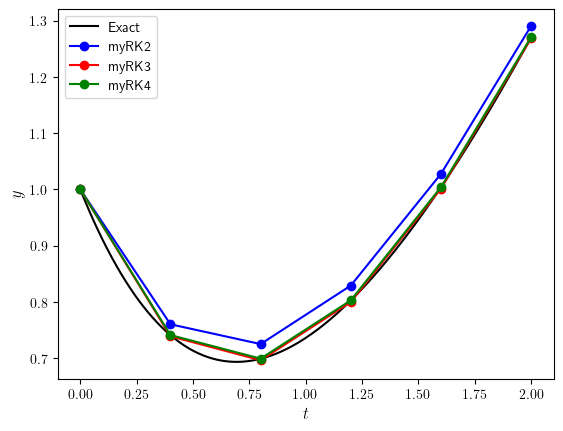

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def myrk2(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 3/4 * h, y + 3 / 4 * h * k1)
    return y + h / 3 * (k1 + 2 * k2)


def myrk3(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 1/2 * h, y + 1/2 * h * k1)
    k3 = f(t + h, y + h * (-k1 + 2 * k2))
    return y + h / 6 * (k1 + 4 * k2 + k3)


def myrk4(f, t, y, h): 
    k1 = f(t, y)
    k2 = f(t + 1/4 * h, y + 1/4 * h * k1)
    k3 = f(t + 1/2 * h, y + 1/2 * h * k2)
    k4 = f(t + h, y + h * (k1 - 2 * k2 + 2 * k3))
    return y + h / 6 * (k1 + 4 * k3 + k4)


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_myrk2 = solveIVP(f, tspan, y0, h, myrk2)
t, y_myrk3 = solveIVP(f, tspan, y0, h, myrk3)
t, y_myrk4 = solveIVP(f, tspan, y0, h, myrk4)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_myrk2, "bo-", label="myRK2")
plt.plot(t, y_myrk3, "ro-", label="myRK3")
plt.plot(t, y_myrk4, "go-", label="myRK4")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("ch2-ex-myrk4-plot", fig, display=False)

```{exercise}
:label: ch2-ex-error-comparison

Use your functions `myrk2()`, `myrk3()` and `myrk4()` from {ref}`ch2-ex-myrk2` and {ref}`ch2-ex-myrk4` to solve the initial value problem from {ref}`ch2-ex-myrk2-hand-calc` using a range of step lengths starting at $h=0.4$ and halving each time until $h=0.025$. Plot the global truncation errors for the numerical solutions for the solution at $t=2$ against $h$ on a loglog scale and estimate the order of the three methods.
```

``````{solution} ch2-ex-error-comparison
:class: dropdown

Global truncation errors

```
|   h   |  myRK2   |  myRK3   |  myRK4   |
|:-----:|:--------:|:--------:|:--------:|
| 0.400 | 2.01e-02 | 1.99e-03 | 1.61e-04 |
| 0.200 | 4.23e-03 | 2.12e-04 | 8.53e-06 |
| 0.100 | 9.74e-04 | 2.44e-05 | 4.90e-07 |
| 0.050 | 2.34e-04 | 2.93e-06 | 2.94e-08 |
| 0.025 | 5.75e-05 | 3.60e-07 | 1.80e-09 |
```

Plot 

```{glue:figure} ch2-ex-error-comparison-plot
:figwidth: 500
```

Estimating the order of the methods

$$ \begin{align*}
  \text{myRK2}: && n & \approx \frac{\log(2.01 \times 10^{-2}) - \log(5.75 \times 10^{-5})}{\log(0.4) - \log(0.025)} = 2.11 \approx 2, \\
  \text{myRK3}: && n & \approx \frac{\log(1.99 \times 10^{-3}) - \log(8.53 \times 10^{-6})}{\log(0.4) - \log(0.025)} = 3.11 \approx 3, \\
  \text{myRK4}: && n & \approx \frac{\log(1.61 \times 10^{-4}) - \log(1.80 \times 10^{-9})}{\log(0.4) - \log(0.025)} = 4.11 \approx 4.
\end{align*} $$

Code 

`````{tab-set} 
````{tab-item} Python

```python
# Calculate solution for decreasing step lengths
hvals = [0.4, 0.2, 0.1, 0.05, 0.025]
tval = 2
E_myrk2, E_myrk3, E_myrk4 = [], [], []
for h in hvals:
    t, y_myrk2 = solveIVP(f, tspan, y0, h, myrk2)
    t, y_myrk3 = solveIVP(f, tspan, y0, h, myrk3)
    t, y_myrk4 = solveIVP(f, tspan, y0, h, myrk4)
    idx = np.argmin(abs(t - tval))
    E_myrk2.append(abs(exact(tval) - y_myrk2[idx,0]))
    E_myrk3.append(abs(exact(tval) - y_myrk3[idx,0]))
    E_myrk4.append(abs(exact(tval) - y_myrk4[idx,0]))

# Output table of errors
print("|   h   |  myRK2   |  myRK3   |  myRK4   |")
print("|:-----:|:--------:|:--------:|:--------:|")
for n in range(len(hvals)):
    print(f"| {hvals[n]:0.3f} | {E_myrk2[n]:0.2e} | {E_myrk3[n]:0.2e} | {E_myrk4[n]:0.2e} |")

# Plot errors on a log scale
fig, ax = plt.subplots()
plt.loglog(hvals, E_myrk2, 'ro-', label="myRK2")
plt.loglog(hvals, E_myrk3, 'bo-', label="myRK3")
plt.loglog(hvals, E_myrk4, 'go-', label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=12)
plt.ylabel(r"$\log(E(h))$", fontsize=12)
plt.legend()
plt.show()
```

````

````{tab-item} MATLAB

```matlab
% Calculate solution for decreasing step lengths
hvals = [0.4, 0.2, 0.1, 0.05, 0.025];
tval = 2;
E_myrk2 = [];
E_myrk3 = [];
E_myrk4 = [];
for h = hvals
    [t, y_myrk2] = solveIVP(f, tspan, y0, h, @myrk2);
    [t, y_myrk3] = solveIVP(f, tspan, y0, h, @myrk3);
    [t, y_myrk4] = solveIVP(f, tspan, y0, h, @myrk4);
    [~, idx] = min(abs(tval - t));
    E_myrk2 = [E_myrk2, abs(exact(tval) - y_myrk2(idx))];
    E_myrk3 = [E_myrk3, abs(exact(tval) - y_myrk3(idx))];
    E_myrk4 = [E_myrk4, abs(exact(tval) - y_myrk4(idx))];
end

% Output table of errors (for loop is used to group print statements)
for i = 1 : 1
    fprintf('|   t   |  myRK2   |  myRK4   |  myRK4   |')
    fprintf('|:-----:|:--------:|:--------:|:--------:|');
    for n = 1 : length(hvals)
        fprintf('\n| %1.3f | %1.2e | %1.2e | %1.2e |', hvals(n), E_myrk2(n), E_myrk3(n), E_myrk4(n))
    end
end

% Plot errors on a loglog scale
loglog(hvals, E_myrk2, 'ro-', MarkerFaceColor='r', LineWidth=2)
hold on
loglog(hvals, E_myrk3, 'bo-', MarkerFaceColor='b', LineWidth=2)
loglog(hvals, E_myrk4, 'go-', MarkerFaceColor='g', LineWidth=2)
hold off
axis padded
xlabel('$\log(h)$', FontSize=14, Interpreter='latex')
ylabel('$\log(E(h))$', FontSize=14, Interpreter='latex')
legend('myRK2', 'myRK3', 'myRK4', Location='southeast', FontSize=12)
```

````
`````
``````

In [ ]:
# Calculate solution for decreasing step lengths
hvals = [0.4, 0.2, 0.1, 0.05, 0.025]
tval = 2
E_myrk2, E_myrk3, E_myrk4 = [], [], []
for h in hvals:
    t, y_myrk2 = solveIVP(f, tspan, y0, h, myrk2)
    t, y_myrk3 = solveIVP(f, tspan, y0, h, myrk3)
    t, y_myrk4 = solveIVP(f, tspan, y0, h, myrk4)
    idx = np.argmin(abs(t - tval))
    E_myrk2.append(abs(exact(tval) - y_myrk2[idx,0]))
    E_myrk3.append(abs(exact(tval) - y_myrk3[idx,0]))
    E_myrk4.append(abs(exact(tval) - y_myrk4[idx,0]))

# Output table of errors
print("|   h   |  myRK2   |  myRK3   |  myRK4   |")
print("|:-----:|:--------:|:--------:|:--------:|")
for n in range(len(hvals)):
    print(f"| {hvals[n]:0.3f} | {E_myrk2[n]:0.2e} | {E_myrk3[n]:0.2e} | {E_myrk4[n]:0.2e} |")

# Plot errors on a log scale
fig, ax = plt.subplots()
plt.loglog(hvals, E_myrk2, 'ro-', label="myRK2")
plt.loglog(hvals, E_myrk3, 'bo-', label="myRK3")
plt.loglog(hvals, E_myrk4, 'go-', label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=12)
plt.ylabel(r"$\log(E(h))$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("ch2-ex-error-comparison-plot", fig, display=False)

```{exercise}
:label: ch2-ex-rk23

Combining Heun's method and Kutta's third-order method gives the following Butcher tableau for an embedded Runge-Kutta method

$$ \begin{array}{c|ccc}
    0 & \\
    1/2 & 1/2 \\
    1 & -1 & 2 \\ \hline
    & 1/6 & 2/3 & 1/6 \\
    & 0 & 1 & 0 
\end{array}$$

where the first row of the $b$ coefficients gives the third-order accurate solution and the second row gives the second-order accurate solution. Define a function called `rk23()` that calculates the second and third order solutions over a single step and, along with the `solveIVP_SSC()` function from the section on [adaptive stepsize control](ssc-code-section), use it to solve the initial value problem from {ref}`ch2-ex-myrk2-hand-calc` using an initial step length of $h_0=0.4$ and an accuracy tolerance of $tol = 10^{-4}$. How many successful steps and failed steps were used?
```

``````{solution} ch2-ex-rk23
:class: dropdown

Plot

```{glue:figure} ch2-ex-rk23-plot
:figwidth: 600
```

There were 26 successful steps and 3 failed steps.

Code

`````{tab-set}
````{tab-item} Python

```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def solveIVP_SSC(f, tspan, y0, h, solver, tol=1e-4):

    # Define t and y arrays
    t = np.zeros(10000)
    y = np.zeros((10000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Solver loop
    n = 0
    while t[n] < tspan[-1]:

        # Ensure t does not exceed tmax
        h = min(h, tspan[-1] - t[n])

        # Calculate order p+1 and p solutions
        yp1, yp, order = solver(f, t[n], y[n,:], h)

        # Determine whether step was successful or not
        delta = np.max(np.abs(yp1 - yp))
        if delta < tol:
            y[n+1,:] = yp1
            t[n+1] = t[n] + h
            n += 1
        
        # Calculate new value of h
        h *= max(0.5, min(2, 0.9 * (tol / delta) ** (1 / (order + 1))))

    return t[:n+1], y[:n+1,:]


def rk23(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 1/2 * h, y + 1/2 * h * k1)
    k3 = f(t + h, y + h * (-k1 + 2 * k2))
    y3 = y + h / 6 * (k1 + 4 * k2 + k3)
    y2 = y + h * k2
    return y3, y2, 2


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length
tol = 1e-4      # accuracy tolerance

# Calculate the solution to the IVP
t, y = solveIVP_SSC(f, tspan, y0, h, rk23, tol)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="RK23")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()
```
````

````{tab-item} MATLAB
```matlab
% Define ODE function and exact solution
f = @(t, y) t - y;
exact = @(t) t + 2 * exp(-t) - 1;

% Define IVP parameters
tspan = [0, 2];     % boundaries of the t domain
y0 = 1;             % initial value of the solution
h0 = 0.4;           % step length
tol = 1e-4;         % accuracy tolerance

% Calculate the solution to the IVP
[t, y] = solveIVP_SSC(f, tspan, y0, h0, @rk23, tol);

% Output number of successful steps
fprintf("%0i successful steps", length(t) - 1)

% Calculate exact solution for plotting
texact = linspace(tspan(1), tspan(2), 200);
yexact = exact(texact);

% Plot solution
plot(texact, yexact, 'k-', LineWidth=2)
hold on
plot(t, y, 'b-o', LineWidth=2, MarkerFaceColor='b')
hold off
axis padded
xlabel('$t$', FontSize=14, Interpreter='latex')
ylabel('$y$', FontSize=14, Interpreter='latex')
legend('Exact', 'myRK2', Location='northwest', FontSize=12)

% ----------------------------------------------------------------------------
function [t, y] = solveIVP_SSC(f, tspan, y0, h, solver, tol)

% Define t and y arrays
t = zeros(10000);
y = zeros(10000, length(y0));
t(1) = tspan(1);
y(1,:) = y0;

% Loop through the steps
n = 1;
while t(n) < tspan(2)
    
    % Ensure t does not exceed tmax
    h = min(h, tspan(2) - t(n));

    % Calculate order p and p+1 solutions
    [yp1, yp, p] = solver(f, t(n), y(n,:), h);

    % Determine whether the step was successful or not
    delta = max(abs(yp1 - yp));
    if delta < tol
        y(n+1,:) = yp1;
        t(n+1) = t(n) + h;
        n = n + 1;
    end

    % Calculate new value of h
    h = h * max(0.5, min(2, 0.9 * (tol / delta) ^ (1 / (p + 1))));

end

% Remove unused entries from t and y
t(n+1:end) = [];
y(n+1:end,:) = [];

% Print number of successful and failed steps
fprintf("%1i successful steps\n%1i failed steps", nsucc, nfail)

end

% ----------------------------------------------------------------------------
function [y3, y2, order] = rk23(f, t, y, h)

k1 = f(t, y);
k2 = f(t + 1/2 * h, y + 1/2 * h * k1);
k3 = f(t + h, y + h * (-k1 + 2 * k2));
y3 = y + h * (1/6 * k1 + 2/3 * k2 + 1/6 * k3);
y2 = y + h * k2;
order = 2

end
```

````
`````
``````

26 successful steps
3 failed steps


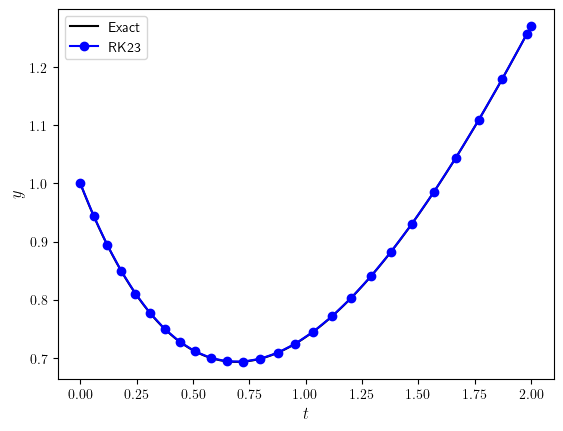

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def solveIVP_SSC(f, tspan, y0, h, solver, tol=1e-4):

    # Define t and y arrays
    t = np.zeros(10000)
    y = np.zeros((10000,len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Solver loop
    n = 0
    while t[n] < tspan[-1]:

        # Ensure t does not exceed tmax
        h = min(h, tspan[-1] - t[n])

        # Calculate order p+1 and p solutions
        yp1, yp, order = solver(f, t[n], y[n,:], h)

        # Determine whether step was successful or not
        delta = np.max(np.abs(yp1 - yp))
        if delta < tol:
            y[n+1,:] = yp1
            t[n+1] = t[n] + h
            n += 1
        
        # Calculate new value of h
        h *= max(0.5, min(2, 0.9 * (tol / delta) ** (1 / (order + 1))))

    return t[:n+1], y[:n+1,:]


def rk23(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 1/2 * h, y + 1/2 * h * k1)
    k3 = f(t + h, y + h * (-k1 + 2 * k2))
    y3 = y + h / 6 * (k1 + 4 * k2 + k3)
    y2 = y + h * k2
    return y3, y2, 2


# Define ODE function and exact solution
def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length
tol = 1e-4      # accuracy tolerance

# Calculate the solution to the IVP
t, y = solveIVP_SSC(f, tspan, y0, h, rk23, tol)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="RK23")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("ch2-ex-rk23-plot", fig, display=False)